# Imports

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#pip freeze > requirements.txt

## Question 1: Open and display data

#### Creating my Relative path to make it easy for you to open:

In [3]:
#Making it easy to open at any cd
cd=os.getcwd() #Geting current directory
cd=cd.replace('\\','/') #Because Pandas and OS don't see eye to eye
data=pd.read_csv(f"{cd}/data_info.csv") #Reading data
data

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
...,...,...,...,...,...,...,...,...,...
153,Taurus,Star,22,3.341,0.66,2.79,0.33,50.62,0.59
154,Virgo,Star,14,76.800,19.60,8.79,9.67,39.18,12.00
155,Spirit,Windstar,25,5.350,1.58,4.40,0.74,33.86,0.88
156,Star,Windstar,27,5.350,1.67,4.40,0.74,32.04,0.88


## Question 2: explore data

# Data exploring

In [4]:
data.isnull().sum() #No null values, All Good!
data.shape #(158,9) seems to be in order!
data.dtypes # types seem to be in order!
data.describe() #Overview of data, Median for crew is 8.15
data.sort_values(by='crew',ascending=False).head(20) #sorted by crew

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
134,Oasis,Royal_Caribbean,4,220.000,54.00,11.82,27.00,40.74,21.00
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
124,Freedom,Royal_Caribbean,7,158.000,43.70,11.12,18.00,36.16,13.60
129,Liberty,Royal_Caribbean,6,158.000,43.70,11.25,18.00,36.16,13.60
126,Independence,Royal_Caribbean,5,160.000,36.34,11.12,18.17,44.03,13.60
67,Fantasia,MSC,5,133.500,39.59,10.93,16.37,33.72,13.13
83,Spirit,Norwegian,15,75.338,19.56,8.79,9.83,38.52,13.00
48,QueenMary2,Cunard,10,151.400,26.20,11.32,11.34,57.79,12.53
101,Diamond,Princess,9,113.000,26.74,9.51,13.37,42.26,12.38
109,Saphire,Princess,9,113.000,26.74,9.51,13.37,42.26,12.38


# Data Visualization

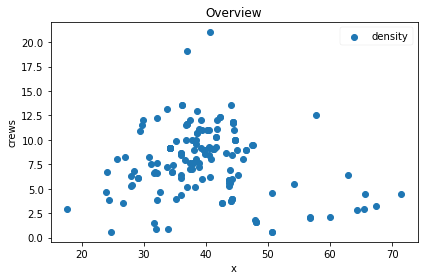

In [5]:
#Quick check of our independent variables relationship with crew SEPERATELY:

#plt.scatter(data.cabins,data.crew,label='Cabins') # seems to have a Linear relationship
#plt.scatter(data.Tonnage,data.crew,label='Tonnage') #Linear
#plt.scatter(data.passengers,data.crew,label='passengers') #Linear
#plt.scatter(data.length,data.crew,label='length') #Related
#plt.scatter(data.Age,data.crew,label='Age') #Not much relation
plt.scatter(data.passenger_density,data.crew,label='density') #Scattered


plt.xlabel('x')
plt.ylabel('crews')
plt.title('Overview')
plt.tight_layout()
plt.style.use('seaborn-notebook')
plt.legend()


## Question 3: select suitable columns for model.

# Checking variable correlations(Pearson coefficient)

In [6]:
data.corr()
#there are quite a lot of correlations. have to remove some:

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
Age,1.000000,-0.606646,-0.515542,-0.532286,-0.510019,-0.278830,-0.530657
Tonnage,-0.606646,1.000000,0.945061,0.922368,0.948764,-0.040846,0.927569
passengers,-0.515542,0.945061,1.000000,0.883535,0.976341,-0.294867,0.915234
length,-0.532286,0.922368,0.883535,1.000000,0.889798,-0.090488,0.895857
cabins,-0.510019,0.948764,0.976341,0.889798,1.000000,-0.253181,0.950823
passenger_density,-0.278830,-0.040846,-0.294867,-0.090488,-0.253181,1.000000,-0.155509
crew,-0.530657,0.927569,0.915234,0.895857,0.950823,-0.155509,1.000000


In [7]:
#Removing Tonnage:
data=data.drop('Tonnage',axis=1)
data.corr() # still high correlation between cabins and passengers(97%)

,Age,passengers,length,cabins,passenger_density,crew
Age,1.000000,-0.515542,-0.532286,-0.510019,-0.278830,-0.530657
passengers,-0.515542,1.000000,0.883535,0.976341,-0.294867,0.915234
length,-0.532286,0.883535,1.000000,0.889798,-0.090488,0.895857
cabins,-0.510019,0.976341,0.889798,1.000000,-0.253181,0.950823
passenger_density,-0.278830,-0.294867,-0.090488,-0.253181,1.000000,-0.155509
crew,-0.530657,0.915234,0.895857,0.950823,-0.155509,1.000000


In [8]:
#Removing cabins:
data=data.drop('cabins',axis=1)
data.corr() #still high correlation between length and passengers.(88%)

,Age,passengers,length,passenger_density,crew
Age,1.000000,-0.515542,-0.532286,-0.278830,-0.530657
passengers,-0.515542,1.000000,0.883535,-0.294867,0.915234
length,-0.532286,0.883535,1.000000,-0.090488,0.895857
passenger_density,-0.278830,-0.294867,-0.090488,1.000000,-0.155509
crew,-0.530657,0.915234,0.895857,-0.155509,1.000000


In [9]:
#Removing length:
data=data.drop('length',axis=1)
data.corr() #All good!


,Age,passengers,passenger_density,crew
Age,1.000000,-0.515542,-0.278830,-0.530657
passengers,-0.515542,1.000000,-0.294867,0.915234
passenger_density,-0.278830,-0.294867,1.000000,-0.155509
crew,-0.530657,0.915234,-0.155509,1.000000


# Model preparation(Cleaning and Dummy variables):

In [10]:
train = data.drop(['Ship_name','crew'],axis=1) #Removing redundant column(ship name) and our dependent variable

#Creating dummy variable:
data['Cruise_line'].value_counts().count() #We have 20 cruise_line names
train =pd.get_dummies(data=train, drop_first=True) #Inserting dummy variable and removing first one (dummy trap)
train.shape #19 columns added

(158, 22)

## Questions 4 & 5: Create a machine learning algorithm with a train size of 60%.

# Modeling with 60% training sample

In [11]:
test = data['crew'] #variable we want to predict (Dependant variable)
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.4, random_state=1) #Train test split
regr = LinearRegression()
regr.fit(x_train,y_train) #fitting trains through linear regression
pred = regr.predict(x_test) #prediction of x_test through linear regression
regr.score(x_test,y_test) #The accuracy using R^2 method (0.9297875475759062)


#Correlation between categorical and number variables

0.9297875475759062

## Question 6: find Pearson correlation coefficient for Train and Test data.

In [12]:
x_train.corr() #Pearson correlation coefficient for Our sample(TRAIN) data

,Age,passengers,passenger_density,Cruise_line_Carnival,Cruise_line_Celebrity,Cruise_line_Costa,Cruise_line_Crystal,Cruise_line_Cunard,Cruise_line_Disney,Cruise_line_Holland_American,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
Age,1.000000,-0.507874,-0.152074,-0.066919,-0.094331,-0.009444,0.042240,0.204292,-0.001233,0.167917,...,-0.001754,NaN,-0.125381,-0.235577,-0.027533,-0.055084,0.152780,-0.010617,0.103175,0.183687
passengers,-0.507874,1.000000,-0.373036,0.263071,-0.014578,0.077419,-0.087007,0.007961,-0.008503,-0.150126,...,-0.158993,NaN,0.122134,0.118686,-0.226452,0.393275,-0.224589,-0.251568,-0.213411,-0.221143
passenger_density,-0.152074,-0.373036,1.000000,-0.186476,-0.051697,-0.106267,0.157839,0.031509,0.083537,0.072717,...,0.065319,NaN,-0.060297,0.054315,0.511494,-0.133448,0.126098,0.432206,-0.041453,0.011302
Cruise_line_Carnival,-0.066919,0.263071,-0.186476,1.000000,-0.099889,-0.090672,-0.039668,-0.056403,-0.039668,-0.124479,...,-0.056403,NaN,-0.056403,-0.139265,-0.069458,-0.160030,-0.056403,-0.069458,-0.090672,-0.056403
Cruise_line_Celebrity,-0.094331,-0.014578,-0.051697,-0.099889,1.000000,-0.061891,-0.027077,-0.038500,-0.027077,-0.084966,...,-0.038500,NaN,-0.038500,-0.095059,-0.047410,-0.109233,-0.038500,-0.047410,-0.061891,-0.038500
Cruise_line_Costa,-0.009444,0.077419,-0.106267,-0.090672,-0.061891,1.000000,-0.024578,-0.034947,-0.024578,-0.077126,...,-0.034947,NaN,-0.034947,-0.086287,-0.043036,-0.099154,-0.034947,-0.043036,-0.056180,-0.034947
Cruise_line_Crystal,0.042240,-0.087007,0.157839,-0.039668,-0.027077,-0.024578,1.000000,-0.015289,-0.010753,-0.033742,...,-0.015289,NaN,-0.015289,-0.037750,-0.018828,-0.043379,-0.015289,-0.018828,-0.024578,-0.015289
Cruise_line_Cunard,0.204292,0.007961,0.031509,-0.056403,-0.038500,-0.034947,-0.015289,1.000000,-0.015289,-0.047977,...,-0.021739,NaN,-0.021739,-0.053676,-0.026771,-0.061679,-0.021739,-0.026771,-0.034947,-0.021739
Cruise_line_Disney,-0.001233,-0.008503,0.083537,-0.039668,-0.027077,-0.024578,-0.010753,-0.015289,1.000000,-0.033742,...,-0.015289,NaN,-0.015289,-0.037750,-0.018828,-0.043379,-0.015289,-0.018828,-0.024578,-0.015289
Cruise_line_Holland_American,0.167917,-0.150126,0.072717,-0.124479,-0.084966,-0.077126,-0.033742,-0.047977,-0.033742,1.000000,...,-0.047977,NaN,-0.047977,-0.118459,-0.059082,-0.136123,-0.047977,-0.059082,-0.077126,-0.047977


In [13]:
x_test.corr() #Pearson correlation coefficient for Our TEST data

,Age,passengers,passenger_density,Cruise_line_Carnival,Cruise_line_Celebrity,Cruise_line_Costa,Cruise_line_Crystal,Cruise_line_Cunard,Cruise_line_Disney,Cruise_line_Holland_American,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
Age,1.000000,-0.570079,-0.485255,0.017083,-0.034332,0.029957,-0.102213,-0.102213,-0.040060,-0.092563,...,-0.055598,0.488241,-0.002488,0.036568,0.042571,-0.184055,0.161938,0.037632,0.115323,0.161938
passengers,-0.570079,1.000000,-0.102834,0.117965,-0.009707,-0.065651,-0.124836,0.122428,-0.017260,-0.110223,...,-0.188418,-0.165619,-0.031754,0.106231,-0.299962,0.562868,-0.264845,-0.250716,-0.091600,-0.271428
passenger_density,-0.485255,-0.102834,1.000000,-0.170958,0.062620,-0.047966,0.391939,0.305461,0.132171,0.157215,...,0.079147,-0.214075,-0.015367,0.047401,0.219180,-0.197308,0.143043,0.288233,-0.140644,-0.125255
Cruise_line_Carnival,0.017083,0.117965,-0.170958,1.000000,-0.111111,-0.138409,-0.054217,-0.054217,-0.054217,-0.125274,...,-0.054217,-0.054217,-0.111111,-0.138409,-0.077290,-0.174078,-0.054217,-0.054217,-0.054217,-0.054217
Cruise_line_Celebrity,-0.034332,-0.009707,0.062620,-0.111111,1.000000,-0.083045,-0.032530,-0.032530,-0.032530,-0.075165,...,-0.032530,-0.032530,-0.066667,-0.083045,-0.046374,-0.104447,-0.032530,-0.032530,-0.032530,-0.032530
Cruise_line_Costa,0.029957,-0.065651,-0.047966,-0.138409,-0.083045,1.000000,-0.040522,-0.040522,-0.040522,-0.093631,...,-0.040522,-0.040522,-0.083045,-0.103448,-0.057767,-0.130107,-0.040522,-0.040522,-0.040522,-0.040522
Cruise_line_Crystal,-0.102213,-0.124836,0.391939,-0.054217,-0.032530,-0.040522,1.000000,-0.015873,-0.015873,-0.036677,...,-0.015873,-0.015873,-0.032530,-0.040522,-0.022628,-0.050965,-0.015873,-0.015873,-0.015873,-0.015873
Cruise_line_Cunard,-0.102213,0.122428,0.305461,-0.054217,-0.032530,-0.040522,-0.015873,1.000000,-0.015873,-0.036677,...,-0.015873,-0.015873,-0.032530,-0.040522,-0.022628,-0.050965,-0.015873,-0.015873,-0.015873,-0.015873
Cruise_line_Disney,-0.040060,-0.017260,0.132171,-0.054217,-0.032530,-0.040522,-0.015873,-0.015873,1.000000,-0.036677,...,-0.015873,-0.015873,-0.032530,-0.040522,-0.022628,-0.050965,-0.015873,-0.015873,-0.015873,-0.015873
Cruise_line_Holland_American,-0.092563,-0.110223,0.157215,-0.125274,-0.075165,-0.093631,-0.036677,-0.036677,-0.036677,1.000000,...,-0.036677,-0.036677,-0.075165,-0.093631,-0.052285,-0.117760,-0.036677,-0.036677,-0.036677,-0.036677


## Question 7: What hyper parameters did your model have?

In [14]:
# Since we used a linear regression model, we did not have any hyper parameters.